In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

In [2]:
# 设置字体，确保中文显示正常
plt.rcParams['font.family'] = 'Heiti TC'

# 定义需要查询的关键词和时间范围
words = ["香港", "广州", "深圳"]
start_year = 1800
end_year = 2022
corpus = "zh"  # 'zh'表示简体中文语料库，英文改成26
smoothing = 0  # 平滑参数

# 初始化一个空的DataFrame
df_final = pd.DataFrame({'year': range(start_year, end_year + 1)})

# 请求并解析数据
for word in words:
    query = word
    url = (
        'https://books.google.com/ngrams/json?content=' + query +
        '&year_start=' + str(start_year) + '&year_end=' +
        str(end_year) + '&corpus=' + str(corpus) + '&smoothing=' +
        str(smoothing)
    )
    
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        
        if data:
            print(f"Extracted data for {word}: {data[0]['timeseries'][:5]}...")  # 打印部分提取的数据以供调试
            timeseries = data[0]['timeseries']
            df_final[word] = timeseries
        else:
            print(f"No data found for {word}")
            df_final[word] = [None] * len(df_final)
    else:
        print(f"Failed to retrieve data for {word}, status code: {response.status_code}")
        df_final[word] = [None] * len(df_final)

# 保存为CSV文件
output_path = "/Users/mac/Desktop/" #自定义文件路径

df_final.to_csv(os.path.join(output_path, 'ngram_frequency.csv'), index=False)
print("数据已保存为 ngram_frequency.csv")


Extracted data for 香港: [2.4868390937626828e-06, 4.283654561731964e-06, 1.5802622783667175e-06, 3.238624231016729e-06, 9.858117664407473e-07]...
Extracted data for 广州: [1.2900477486255113e-05, 2.4923079763539135e-05, 6.373724318109453e-05, 2.4937406124081463e-05, 1.3998527720104903e-05]...
Extracted data for 深圳: [0.0, 3.89423121305299e-07, 0.0, 0.0, 1.9716236465683323e-07]...
数据已保存为 ngram_frequency.csv


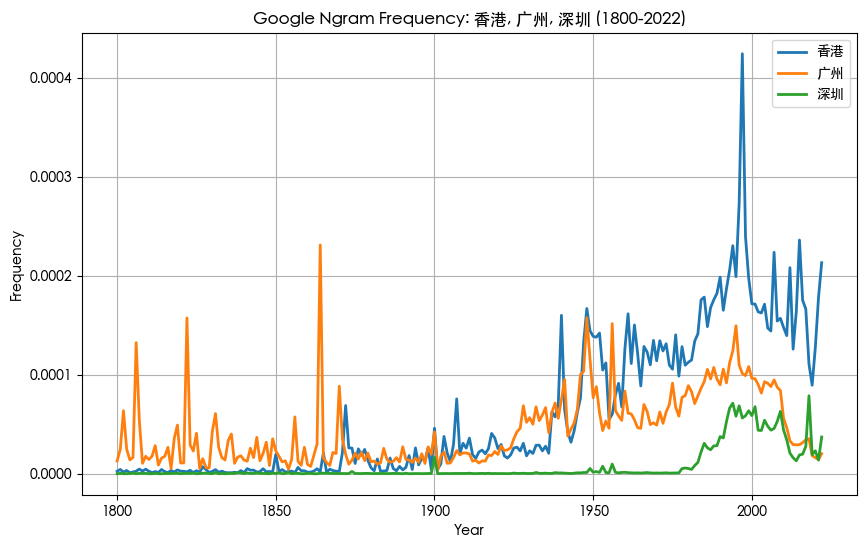

In [3]:
plt.figure(figsize=(10, 6))

for word in words:
    plt.plot(df_final['year'], df_final[word], label=word, linewidth=2)
plt.title(f'Google Ngram Frequency: {", ".join(words)} ({start_year}-{end_year})')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()